Model Performance:
RMSE: 1.0312259859499082
R^2 Score: 0.9579295948206774


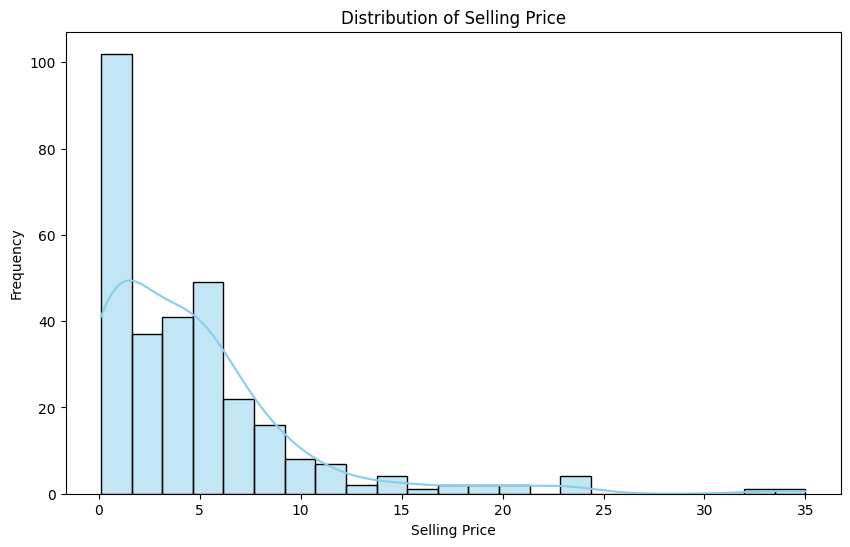

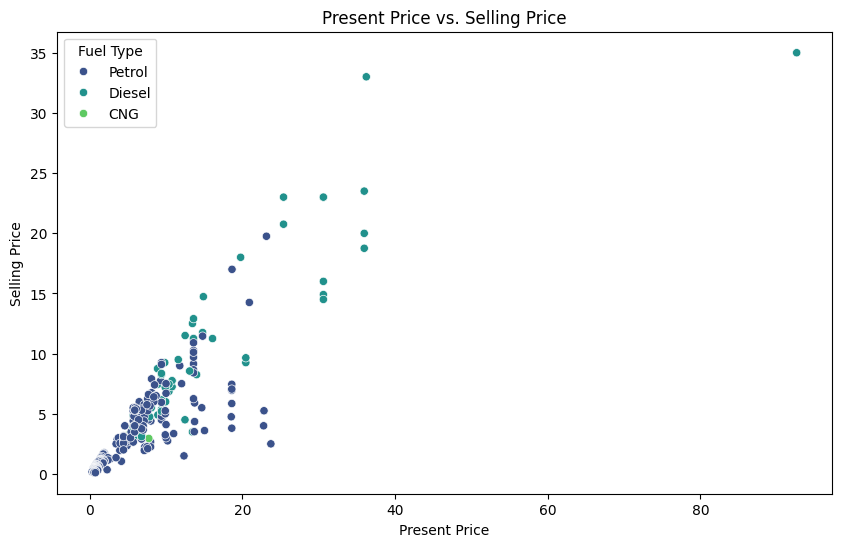

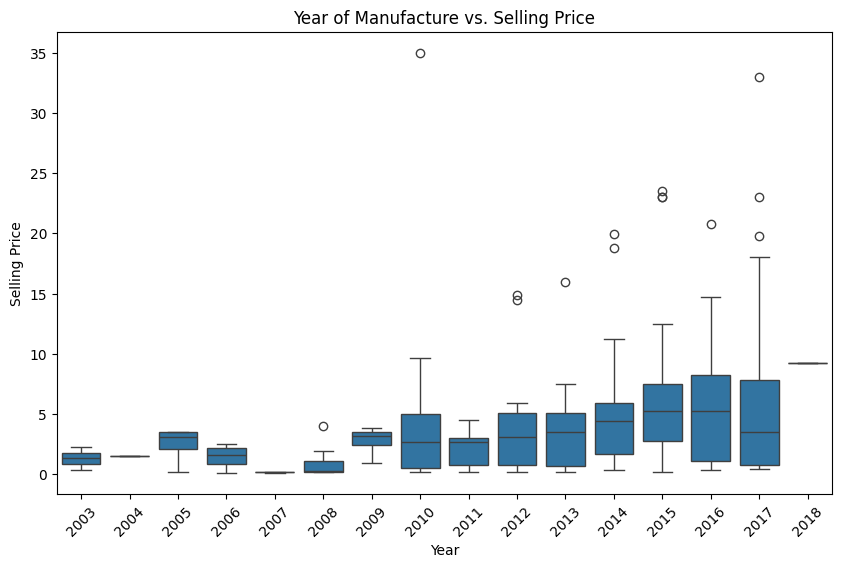

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
car_data = pd.read_csv(r"C:\Users\Mihir Patel\Downloads\Oasis\Task 3\car data.csv")

# Define features and target variable
X = car_data.drop(columns=['Car_Name', 'Selling_Price'])
y = car_data['Selling_Price']

# Categorical and numerical feature lists
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define the model pipeline with preprocessing and a RandomForestRegressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=0))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

# Visualization 1: Distribution of Selling Price
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Selling_Price'], kde=True, color='skyblue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Scatter plot of Present Price vs. Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=car_data, hue='Fuel_Type', palette='viridis')
plt.title('Present Price vs. Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.legend(title='Fuel Type')
plt.show()

# Visualization 3: Year of Manufacture vs. Selling Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Selling_Price', data=car_data)
plt.title('Year of Manufacture vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()
